# A Self-Exercise on the San Francisco Salaries Dataset

Note that you might need to download the dataset if you want to run the code in this notebook. Don't forget to check that the dataset file is in the same folder as you are working in. 

You can download the dataset here: https://www.kaggle.com/kaggle/sf-salaries

Let's start.

__Importing the Libraries we'll be using.__

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

__Reading the data from the CSV file.__

In [19]:
sal = pd.read_csv('Salaries.csv', low_memory = False)

Note that my CSV file is in the same folder as my jupyter notebook file, therefore I am able to just give the CSV file's name.
If your CSV file is not in the same folder as the location you are currently working in, then you might need to give in the file's full address.

__Checking the data.__

In [20]:
# It is always recommended to check the head of the data file you are working with.
sal.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [21]:
# Note that the default parameter for the head() function is 5, but you can change it as such:
sal.head(3)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN


In [22]:
# Or:
sal.head(10)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN
5,6,DAVID SULLIVAN,ASSISTANT DEPUTY CHIEF II,118602.0,8601.0,189082.74,NaN,316285.74,316285.74,2011,NaN,San Francisco,NaN
6,7,ALSON LEE,"BATTALION CHIEF, (FIRE DEPARTMENT)",92492.01,89062.9,134426.14,NaN,315981.05,315981.05,2011,NaN,San Francisco,NaN
7,8,DAVID KUSHNER,DEPUTY DIRECTOR OF INVESTMENTS,256576.96,0.0,51322.5,NaN,307899.46,307899.46,2011,NaN,San Francisco,NaN
8,9,MICHAEL MORRIS,"BATTALION CHIEF, (FIRE DEPARTMENT)",176932.64,86362.68,40132.23,NaN,303427.55,303427.55,2011,NaN,San Francisco,NaN
9,10,JOANNE HAYES-WHITE,"CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)",285262.0,0.0,17115.73,NaN,302377.73,302377.73,2011,NaN,San Francisco,NaN


__Accessing the information about the dataset.__

In [23]:
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
Id                  148654 non-null int64
EmployeeName        148654 non-null object
JobTitle            148654 non-null object
BasePay             148049 non-null object
OvertimePay         148654 non-null object
OtherPay            148654 non-null object
Benefits            112495 non-null object
TotalPay            148654 non-null float64
TotalPayBenefits    148654 non-null float64
Year                148654 non-null int64
Notes               0 non-null float64
Agency              148654 non-null object
Status              38119 non-null object
dtypes: float64(3), int64(2), object(8)
memory usage: 14.7+ MB


Notice that we have different amount of values for the columns of __BasePay__ and __Benefits__. It is important to notice these details early on.

__Converting the payment-related columns to numeric values.__

If you had 'played' with the dataset already, you probably have seen that there are some columns that have no data, or some with missing data. And there are also columns that are not in numeric form but rather in string forms. For examply, try to get the BasePay value of the __148646th__ entry in the dataset.

In [24]:
sal['BasePay'][148646]

'Not Provided'

These kind of rows are posing numerous problems for us, of which is that we cannot deal with multiple type of objects (integer, string etc.) at the same time. Therefore, we need to convert everything to numeric values.

In [25]:
sal = sal.convert_objects(convert_numeric = True)

C:\DS\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


We see that it gives us a FutureWarning, saying that the function we are trying to use here is deprecated, meaning that it will not be in use in the future. So, it is of our best interest that we write our own function to convert the payment related columns into numeric values.

In [26]:
for column in ['BasePay', 'OvertimePay', 'OtherPay', 'Benefits']:
    sal[column] = pd.to_numeric(sal[column], errors = 'coerce')

Now, let's try to get the __average BasePay value.__

In [27]:
sal['BasePay'].mean() # See that it is infact working.

66325.44884050643

When we used the __info()__ function, we saw that the __Notes__ column is missing a lot of values. Therefore, it is of our best interest to drop that column for good.

In [28]:
# The 'axis' parameter is by-default set to 0, which indicates the rows.
# Since our dataset has no row label with 'Notes', it would throw and error.
# And since we want to drop a COLUMN, but not a row, we need to specify it
# by saying axis = 1
sal = sal.drop('Notes', axis = 1)

__What is the highest amount of OvertimePay in the dataset?__

In [29]:
sal['OvertimePay'].max()

245131.88

__Who is getting the highest amount of OvertimePay?__

In [31]:
sal[sal['OvertimePay'] == sal['OvertimePay'].max()]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency,Status
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,San Francisco,NaN


__Who is getting an OvertimePay between 150.000 and 200.000?__

In [39]:
sal[(sal['OvertimePay'] >= 150000) & (sal['OvertimePay'] <= 200000)]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency,Status
36163,36164,Frederick Binkley,EMT/Paramedic/Firefighter,126863.19,192424.49,17917.18,44438.25,337204.86,381643.11,2012,San Francisco,NaN
36199,36200,Scott Scholzen,Firefighter,109783.86,160418.47,19873.80,41230.89,290076.13,331307.02,2012,San Francisco,NaN
72943,72944,Gary L Altenberg,"Lieutenant, Fire Suppression",135903.02,163477.81,20994.96,46030.76,320375.79,366406.55,2013,San Francisco,NaN
72964,72965,Whitney P Yee,Deputy Sheriff,95123.00,196689.18,16622.66,36125.49,308434.84,344560.33,2013,San Francisco,NaN
73021,73022,Barry J Bloom,Deputy Sheriff,95123.08,156077.49,17018.22,35837.91,268218.79,304056.70,2013,San Francisco,NaN
110574,110575,Antonio B Santiago,Deputy Sheriff,94191.04,173547.73,19740.81,38238.57,287479.58,325718.15,2014,San Francisco,FT
110577,110578,Barry J Bloom,Deputy Sheriff,94191.13,173178.23,17960.11,38171.49,285329.47,323500.96,2014,San Francisco,FT
110583,110584,Whitney P Yee,Deputy Sheriff,94191.00,169659.92,16813.46,38311.07,280664.38,318975.45,2014,San Francisco,FT


__What is the job title of Gary L Altenberg?__

In [40]:
sal[sal['EmployeeName'] == 'Gary L Altenberg']['JobTitle']

72943     Lieutenant, Fire Suppression
110727    Lieutenant, Fire Suppression
Name: JobTitle, dtype: object

In [42]:
# So it seems that we have two people with the name Gary L Altenberg. Let's try another name:
sal[sal['EmployeeName'] == 'Scott Scholzen']['JobTitle']

36199    Firefighter
Name: JobTitle, dtype: object

__How much does the person with the name Scott Scholzen make including benefits?__

In [43]:
sal[sal['EmployeeName'] == 'Scott Scholzen']['TotalPayBenefits']

36199    331307.02
Name: TotalPayBenefits, dtype: float64

__What is the name of the highest paying person including benefits?__

In [45]:
sal[sal['TotalPayBenefits'] == sal['TotalPayBenefits'].max()]['EmployeeName']

0    NATHANIEL FORD
Name: EmployeeName, dtype: object

Or if we want to see the whole row for that person:

In [46]:
sal[sal['TotalPayBenefits'] == sal['TotalPayBenefits'].max()]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,San Francisco,NaN


__What is the name of the lowest paying person including benefits?__

In [47]:
sal[sal['TotalPayBenefits'] == sal['TotalPayBenefits'].min()]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency,Status
148653,148654,Joe Lopez,"Counselor, Log Cabin Ranch",0.0,0.0,-618.13,0.0,-618.13,-618.13,2014,San Francisco,PT


Do you notice something? This person has a TotalPay of -618 dollars. A negative value. Interesting.

__What is the average values of all employees per year?__

In [49]:
sal.groupby('Year').mean()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits
Year,,,,,,,
2011,18080.0,63595.956517,4531.065429,3617.081926,NaN,71744.103871,71744.103871
2012,54542.5,65436.406857,5023.417824,3653.437583,26439.966967,74113.262265,100553.229232
2013,91728.5,69630.030216,5281.641980,3819.969007,23829.076572,77611.443142,101440.519714
2014,129593.0,66564.421924,5401.993737,3505.421251,24789.601756,75463.918140,100250.918884


What is the average __TotalPayBenefits__ of all employees per year?

In [51]:
sal.groupby('Year').mean()['TotalPayBenefits']

Year
2011     71744.103871
2012    100553.229232
2013    101440.519714
2014    100250.918884
Name: TotalPayBenefits, dtype: float64

__How many unique job titles are there in the dataset?__

In [52]:
sal['JobTitle'].nunique()

2159

__What are the highest paying jobs?__

In [55]:
sal.groupby('JobTitle')['BasePay'].median().

JobTitle
ACCOUNT CLERK                                          49777.780
ACCOUNTANT                                             60076.240
ACCOUNTANT INTERN                                      16806.755
ACPO,JuvP, Juv Prob (SFERS)                            62290.780
ACUPUNCTURIST                                          66374.400
ADMINISTRATIVE ANALYST                                 71602.900
ADMINISTRATIVE ANALYST II                              59373.710
ADMINISTRATIVE ANALYST III                             92698.515
ADMINISTRATIVE ENGINEER                               130171.010
ADMINISTRATIVE SERVICES MANAGER                        84783.370
ADMINISTRATOR, SFGH MEDICAL CENTER                    245124.440
AFFIRMATIVE ACTION SPECIALIST                          79511.680
AGRICULTURAL INSPECTOR                                 53274.100
AIRPORT ASSISTANT DEPUTY DIRECTOR, BUSINESS ADMINI      1927.500
AIRPORT ASSISTANT DEPUTY DIRECTOR, OPERATIONS          15420.000
AIRPORT COMMUNIC

Let's get the top 10 highest paying jobs.

In [57]:
(sal.groupby(['JobTitle'])['BasePay'].median()).nlargest(10)

JobTitle
Chief of Police                           307450.040
Chief, Fire Department                    302068.000
Gen Mgr, Public Trnsp Dept                294000.180
CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)    285262.000
Mayor                                     281537.170
Dep Dir for Investments, Ret              276153.765
Dept Head V                               270616.270
Adm, SFGH Medical Center                  268946.020
Controller                                267914.000
EXECUTIVE CONTRACT EMPLOYEE               264452.520
Name: BasePay, dtype: float64

__Top 10 highest Overtime paying jobs.__

In [58]:
(sal.groupby(['JobTitle'])['OvertimePay'].median()).nlargest(10)

JobTitle
Wire Rope Cable Maint Sprv                      81313.49
WIRE ROPE CABLE MAINTENANCE SUPERVISOR          66164.73
Trnst Power Line Wrk Sprv 2                     66006.10
Battalion Chief, Fire Suppress                  48063.51
SENIOR POWER GENERATION TECHNICIAN              46504.35
ASSISTANT INSPECTOR (POLICE DEPARTMENT)         45679.84
Incident Support Specialist                     45022.34
MECHANICAL SHOP AND EQUIPMENT SUPERINTENDENT    44930.70
Transit Power Line Sprv1                        44422.37
Asst Chf of Dept (Fire Dept)                    43389.97
Name: OvertimePay, dtype: float64

__What are the top 10 most common jobs?__

In [59]:
sal['JobTitle'].value_counts().head(10)

Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Custodian                       2418
TRANSIT OPERATOR                2388
Firefighter                     2359
Recreation Leader               1971
Patient Care Assistant          1945
Name: JobTitle, dtype: int64

__How many people have the word "officer" in their title?__

In [60]:
def officerWordCount(title):
    if 'officer' in title.lower():
        return True
    else:
        return False
    
sum(sal['JobTitle'].apply(lambda title: officerWordCount(title)))

10063

One last thing I want to do before plotting is to delete the rows of people with negative payments, just to clear my plottings.

In [61]:
sal[sal['TotalPay'] < 0]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency,Status
148653,148654,Joe Lopez,"Counselor, Log Cabin Ranch",0.0,0.0,-618.13,0.0,-618.13,-618.13,2014,San Francisco,PT


Just one person... How about people with 0 salaries?

In [62]:
sal[sal['TotalPay'] == 0]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency,Status
36156,36157,PAULETTE ADAMS,"STATIONARY ENGINEER, WATER TREATMENT PLANT",0.0,0.0,0.0,NaN,0.0,0.00,2011,San Francisco,NaN
36157,36158,KAUKAB MOHSIN,TRANSIT OPERATOR,0.0,0.0,0.0,NaN,0.0,0.00,2011,San Francisco,NaN
36158,36159,JOSEPHINE MCCREARY,MANAGER IV,0.0,0.0,0.0,NaN,0.0,0.00,2011,San Francisco,NaN
70877,70878,Roland Baylon,Deputy Court Clerk II,0.0,0.0,0.0,3728.05,0.0,3728.05,2012,San Francisco,NaN
70927,70928,Felecia Phillips,Registered Nurse,0.0,0.0,0.0,3618.13,0.0,3618.13,2012,San Francisco,NaN
70928,70929,Robert Giannini,Painter,0.0,0.0,0.0,3614.56,0.0,3614.56,2012,San Francisco,NaN
70932,70933,Nelly Kuan,Senior Eligibility Worker,0.0,0.0,0.0,3610.32,0.0,3610.32,2012,San Francisco,NaN
70933,70934,William Mathews,Transit Power Line Worker,0.0,0.0,0.0,3608.42,0.0,3608.42,2012,San Francisco,NaN
70942,70943,Gayle Mathews,Senior Collections Officer,0.0,0.0,0.0,3591.89,0.0,3591.89,2012,San Francisco,NaN
70956,70957,Linda Carter,Transit Car Cleaner,0.0,0.0,0.0,3574.60,0.0,3574.60,2012,San Francisco,NaN


That's ... more than I expected.

In [63]:
len(sal[sal['TotalPay'] == 0])

368

Okay ... yeah. 368 people is definitely much. I am definitely going to get rid of all of them.

In [64]:
len(sal)

148654

In [65]:
sal = sal[sal['TotalPay'] > 0]

In [66]:
len(sal)

148285

Now that we got rid of that 'bad' data, let's start plotting.

# Plotting

Let's work on TotalPay column.

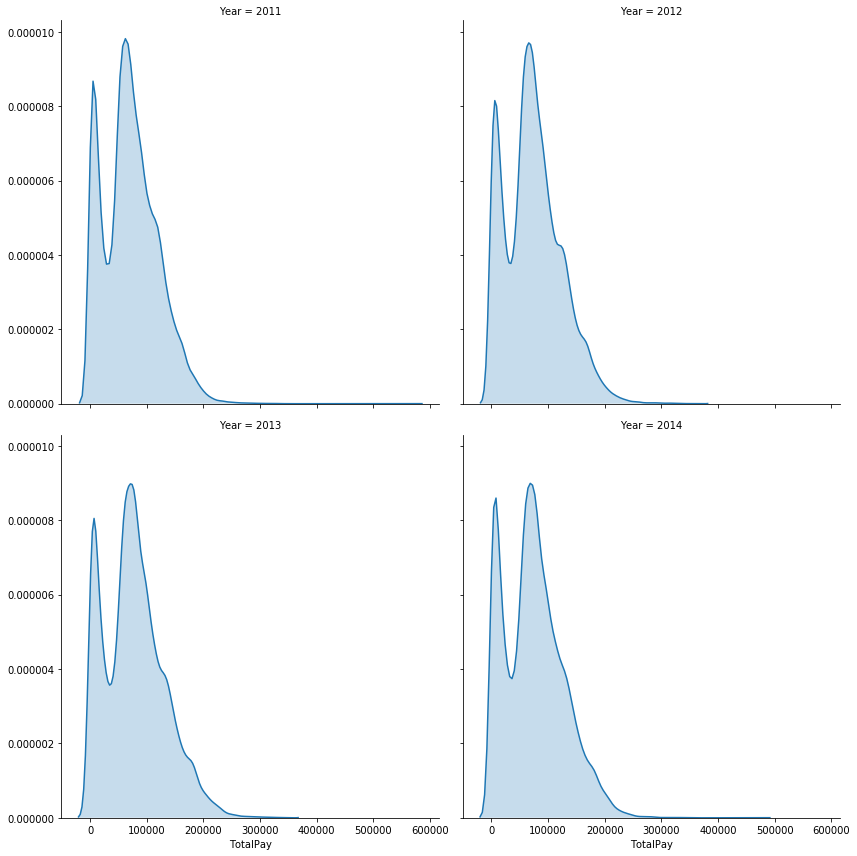

In [83]:
graph = sns.FacetGrid(sal, col="Year", col_wrap=2, height=6, dropna=True)
graph.map(sns.kdeplot, 'TotalPay', shade=True)

There are __two__ things to note here:

1) All four plots looks similar. This indicates of a stable economy or a stable job market.

2) We seem to have __two spikes__. Let's try to understand what they represent.

Text(0.5, 1.0, 'Total Pay Distribution: Full-Time vs. Part-Time')

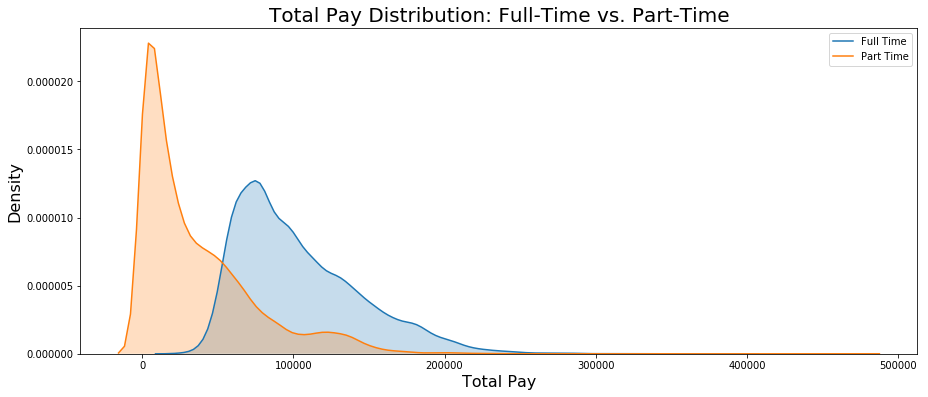

In [100]:
# Remember that we have 2 types of job status values: Part-time and Full-time.
# Let's separate them.
full_time = sal[sal['Status'] == 'FT']
part_time = sal[sal['Status'] == 'PT']

# Using subplots() function to plot different datas on top of each other.
fig, ax = plt.subplots(figsize=(15,6))

# Plotting the separated data.
sns.kdeplot(full_time['TotalPay'].dropna(), label="Full Time", shade=True, ax=ax)
sns.kdeplot(part_time['TotalPay'].dropna(), label="Part Time", shade=True, ax=ax)

# Setting the titles.
plt.xlabel('Total Pay', fontsize=16)
plt.ylabel('Density', fontsize=16)
plt.title('Total Pay Distribution: Full-Time vs. Part-Time', fontsize=20)

So it seems that those two pikes are basically indicating the different types of job status.

__Now let's plot the data for 'BasePay' instead of 'TotalPay'.__

Text(0.5, 1.0, 'Base Pay Distribution: Full-Time vs. Part-Time')

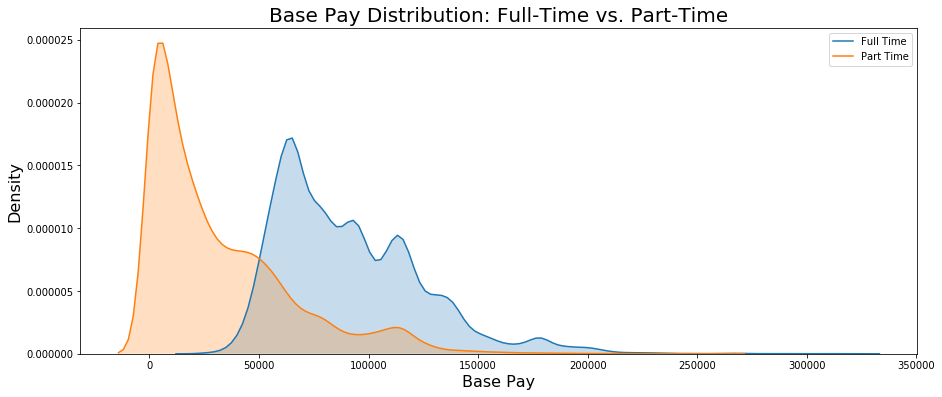

In [99]:
fig, ax = plt.subplots(figsize=(15,6))

# Plotting the separated data.
sns.kdeplot(full_time['BasePay'].dropna(), label="Full Time", shade=True, ax=ax)
sns.kdeplot(part_time['BasePay'].dropna(), label="Part Time", shade=True, ax=ax)

# Setting the titles.
plt.xlabel('Base Pay', fontsize=16)
plt.ylabel('Density', fontsize=16)
plt.title('Base Pay Distribution: Full-Time vs. Part-Time', fontsize=20)

Although this BasePay distribution looks similar to the previous TotalPay distribution, we have different spikes in this one.

__Now let's plot the data for OvertimePay.__

Text(0.5, 1.0, 'Overtime Pay Distribution: Full-Time vs. Part-Time')

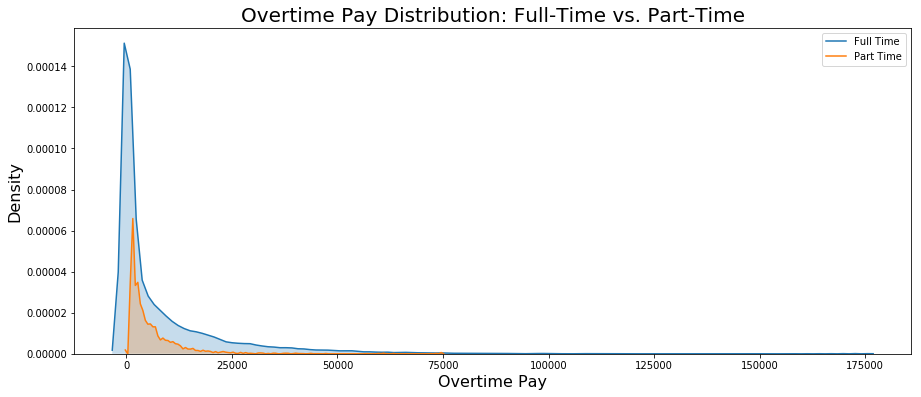

In [98]:
fig, ax = plt.subplots(figsize=(15,6))

# Plotting the separated data.
sns.kdeplot(full_time['OvertimePay'].dropna(), label="Full Time", shade=True, ax=ax)
sns.kdeplot(part_time['OvertimePay'].dropna(), label="Part Time", shade=True, ax=ax)

# Setting the titles.
plt.xlabel('Overtime Pay', fontsize=16)
plt.ylabel('Density', fontsize=16)
plt.title('Overtime Pay Distribution: Full-Time vs. Part-Time', fontsize=20)

Two things to note here:

1) It is not that surprising that most people don't get paid for their overtimes, that is a common thing unfortunately.

2) Looking at the tail of the graph, we can see that someone is getting paid __more than 175.000 dollars for overtime__... Now, that's impressive!

__Now, let's plot the data for Benefits.__

Text(0.5, 1.0, 'Benefits Distribution: Full-Time vs. Part-Time')

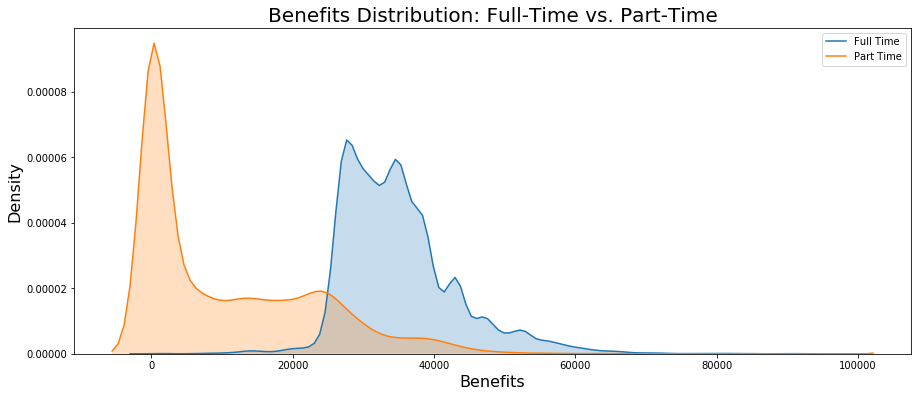

In [97]:
fig, ax = plt.subplots(figsize=(15,6))

# Plotting the separated data.
sns.kdeplot(full_time['Benefits'].dropna(), label="Full Time", shade=True, ax=ax)
sns.kdeplot(part_time['Benefits'].dropna(), label="Part Time", shade=True, ax=ax)

# Setting the titles.
plt.xlabel('Benefits', fontsize=16)
plt.ylabel('Density', fontsize=16)
plt.title('Benefits Distribution: Full-Time vs. Part-Time', fontsize=20)

This graph basically indicates that full-time employees are usually getting more benefits than part-time employees.

__Let's draw the heatmap of our dataset.__

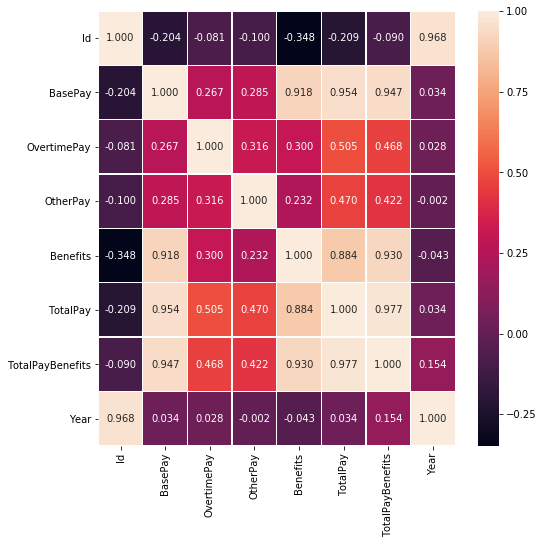

In [110]:
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(sal.corr(), annot=True, linewidths=0.3, fmt= '.3f', ax=ax)

__Let's draw the bar plot of the most popular 30 jobs.__

Text(0.5, 1.0, 'Most Popular 30 Jobs and Their Distribution')

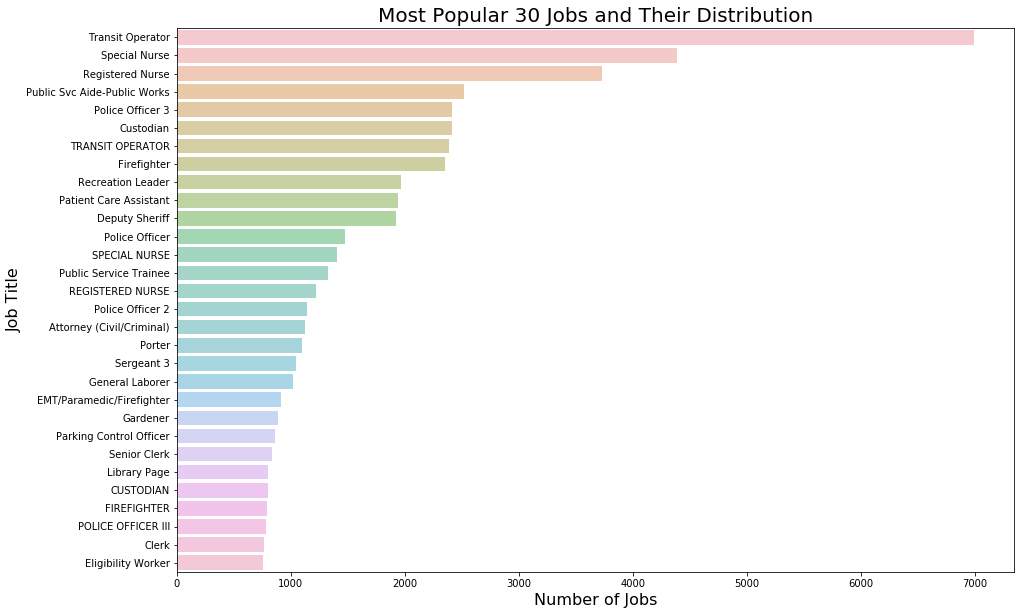

In [119]:
plt.figure(figsize=(15,10))
jobs = sal['JobTitle'].value_counts()[0:30]
sns.barplot(x=jobs.values, y=jobs.index, alpha=0.5)
plt.xlabel("Number of Jobs", fontsize=16)
plt.ylabel("Job Title", fontsize=16)
plt.title("Most Popular 30 Jobs and Their Distribution", fontsize=20)

### Now let's use Seaborn's JointPlot class.

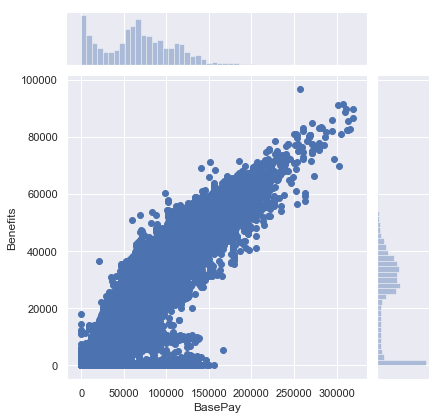

In [131]:
sns.set(style="darkgrid", color_codes=True)
g = sns.jointplot(x="BasePay", y="Benefits", data=sal)

__Density Plot.__

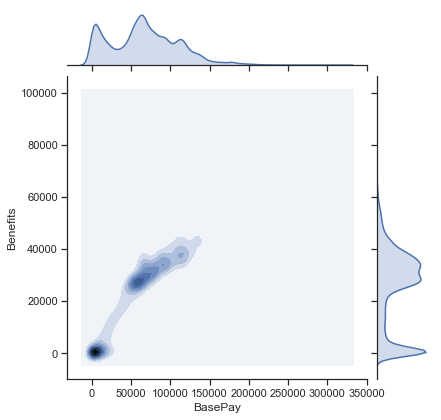

In [133]:
g = sns.jointplot(x="BasePay", y='Benefits', kind="kde", data=sal)

Now, this is not a good graph. Because the representation of the data could me more clearer. But since the values of the dataset are too broad (that there are people getting 100.000 dollars of benefits or that there are people getting 300.000 dollars of BasePay) it would be better if we trim it a bit.

In [136]:
# Restricting my data down to the people who get less than 100.000 dollars of BasePay
# and down to the people who get less than 40.000 dollars of Benefits.
sal = sal[sal['BasePay'] < 100000]
sal = sal[sal['Benefits'] < 40000]

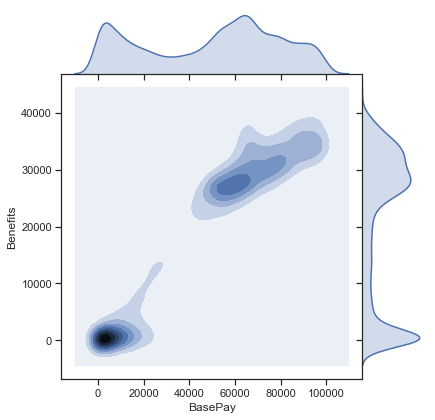

In [146]:
# Now, let's plot the graph again.
g = sns.jointplot(x="BasePay", y='Benefits', kind="kde", data=sal, space=0)

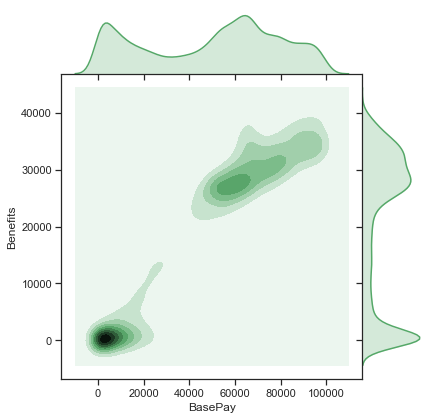

In [148]:
g = sns.jointplot(x="BasePay", y='Benefits', kind="kde", data=sal, color="g", space=0)

__Regression and kernel density fits.__

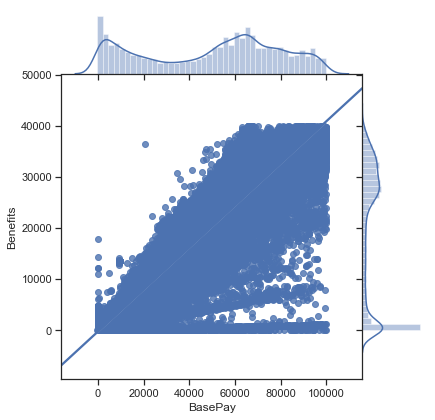

In [145]:
g = sns.jointplot(x="BasePay", y='Benefits', kind="reg", data=sal, space=0)

Using the type __hex__.

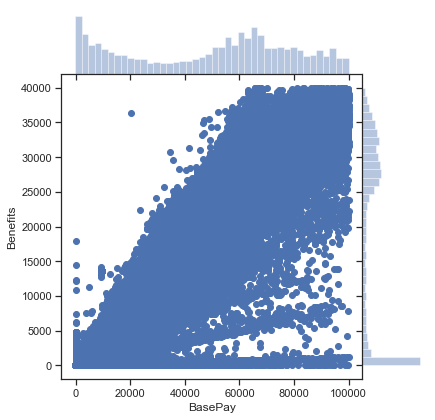

In [144]:
g = sns.jointplot(x="BasePay", y='Benefits', kind="scatter", data=sal, space=0)

End.